In [16]:
import pandas as pd
from pandas import Series, DataFrame


In [17]:
t = pd.read_csv('train.csv')
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

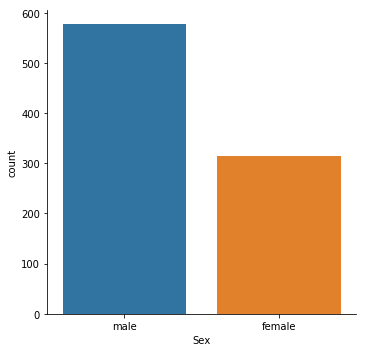

In [20]:
sns.catplot('Sex', data = t, kind ='count')

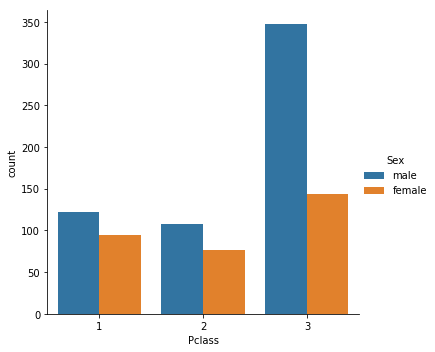

In [21]:
sns.catplot('Pclass', data = t, hue='Sex', kind ='count')

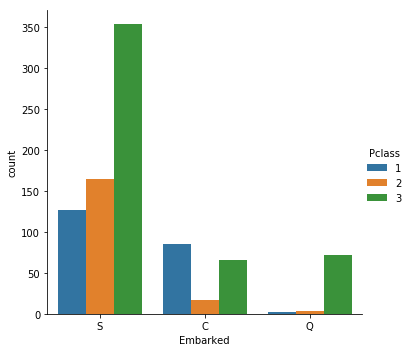

In [22]:
sns.catplot('Embarked', data = t, hue='Pclass', kind ='count')

In [23]:
def catgory(age):

    
    if age < 16:
        return "Child"
    elif age > 16 and age < 50:
        return "Adult"
    elif age > 50:
        return "OLD"
    else:
        return "Age not available"

In [24]:
t["Age Group"] = [x for x in catgory(t['Age'])]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

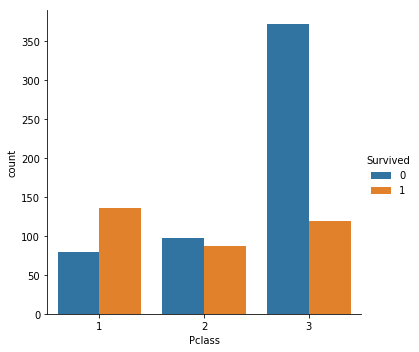

In [8]:
sns.catplot('Pclass', data = t, hue='Survived', kind ='count')

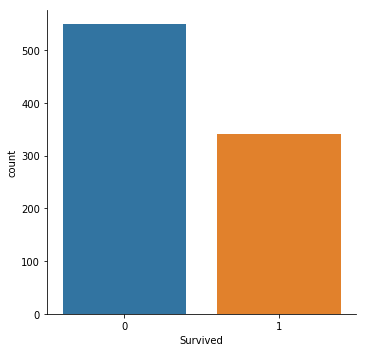

In [9]:
#survivor
sns.catplot('Survived', data = t, kind ='count')

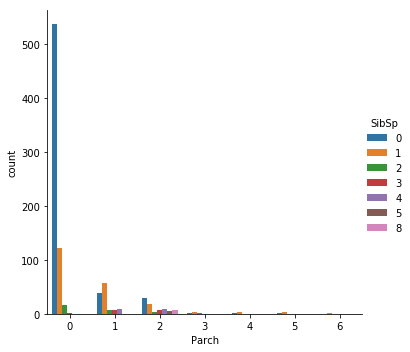

In [12]:
#alone and with family
sns.catplot('Parch', data = t,hue = "SibSp", kind ='count')

In [25]:
d = t['Cabin'].dropna()
deck = [d[0] for d in d]
deck

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

(0, 3)

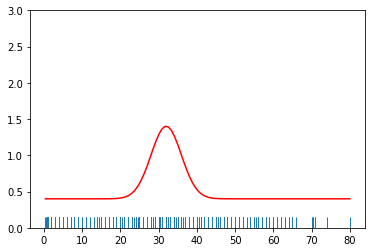

In [34]:
#kde for age pclass
from scipy import stats
sns.rugplot(t['Age'])
xmin = t['Age'].min()
xmax = t['Age'].max()

x_axis = np.linspace(xmin, xmax, 100)
bandwidth = ((4 * (t['Age'].std()) ** 5) / (3 * len(t['Age']))) ** 0.2

kernal_list = []

for data_points in t['Age']:
    kernal = stats.norm(data_points, bandwidth).pdf(x_axis)
    kernal_list.append(kernal)
    
    kernal =kernal / kernal.max()
    kernal = kernal + 0.4
    
plt.plot(x_axis, kernal, color = "red", alpha = 1)
plt.ylim(0, max(t['Pclass']))

In [ ]:
g = FactGrid(t, hue ='Sex', aspect = 4)

g.map(sns.kdeplot, )



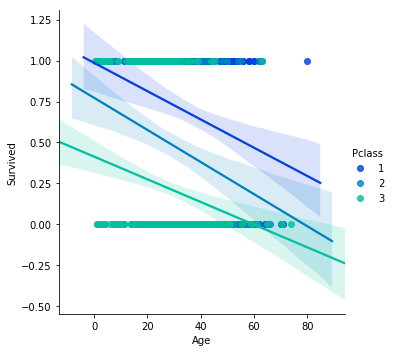

In [38]:
sns.lmplot('Age', 'Survived',hue = 'Pclass',palette = 'winter', data = t)